# Result Comparison  - Important Previews

Here the following previews will be evaluated with their generations in test:
- Index IP
- Index L2
- Cosine Distance
- L2_k8
- new_prompt_L2


The evaluation will be through the Rouge-L, Accuracy and appearence of the gold document

In [2]:
import polars as pl
import seaborn as sns
import matplotlib.pyplot as plt
import os



## Data Loading

In [13]:
PREFIX_PATH = "previews"

previews = {
    "0": "preview_50_L2",
    "1": "preview_50_IP",
    "2": "new_prompt_preview_50_cosine",
    "3": "preview_50_L2_k8",
    "4": "new_prompt_preview_50_L2"
}

dfs = []
retrieval_enum = pl.Enum(["rag", "datamodels"])

for f in os.listdir("previews_results"):

    _preview_num = f.split("_")[1]


    retrieval = "rag"
    if f.endswith("datamodels.feather"):
        retrieval = "datamodels"
    

    _df = pl.read_ipc(f"previews_results/{f}")
    _df = _df.with_columns(pl.lit(retrieval).alias("retrieval"))
    _df = _df.with_columns(pl.lit(previews[_preview_num]).alias("type"))
    dfs.append(_df)

df = pl.concat(dfs)
df


idx,mean,max,metric,retrieval,type
i64,f64,f64,str,str,str
0,0.0,0.0,"""rouge_l""","""rag""","""new_prompt_preview_50_L2"""
1,0.8,1.0,"""rouge_l""","""rag""","""new_prompt_preview_50_L2"""
2,0.0,0.0,"""rouge_l""","""rag""","""new_prompt_preview_50_L2"""
3,0.066667,0.333333,"""rouge_l""","""rag""","""new_prompt_preview_50_L2"""
4,0.057143,0.285714,"""rouge_l""","""rag""","""new_prompt_preview_50_L2"""
…,…,…,…,…,…
45,0.0,0.0,"""squad_v2_best_exact""","""rag""","""preview_50_L2"""
46,0.0,0.0,"""squad_v2_best_exact""","""rag""","""preview_50_L2"""
47,0.0,0.0,"""squad_v2_best_exact""","""rag""","""preview_50_L2"""


## Plot Results

<Axes: xlabel='type', ylabel='mean'>

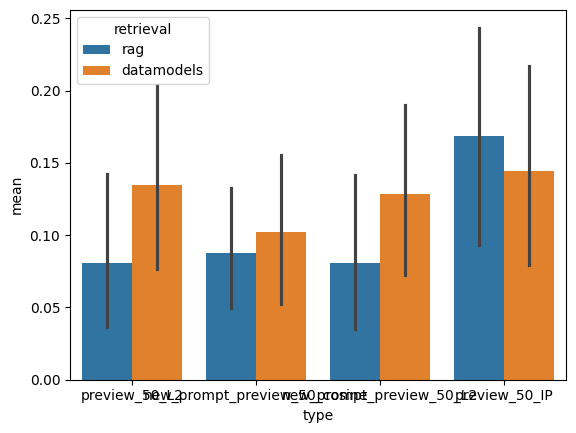

In [20]:
_agg_f1 = (
    df
    .filter(pl.col("metric") == "squad_v2_best_f1")
    .group_by(["retrieval", "type", "idx"])
    .agg(pl.col("mean").mean())
)

sns.barplot(
    data=_agg_f1,
    x="type",
    y="mean",
    hue="retrieval"
)

<Axes: xlabel='type', ylabel='mean'>

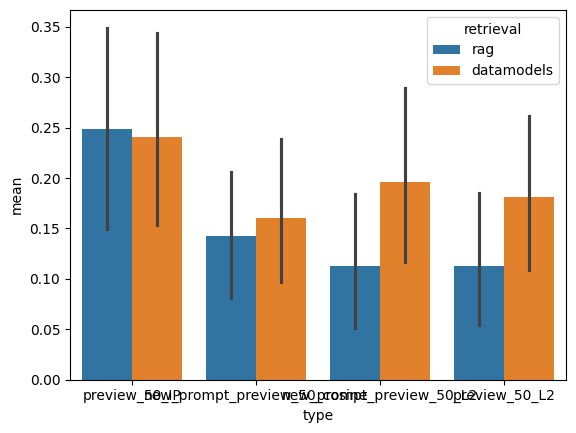

In [21]:
_agg_f1 = (
    df
    .filter(pl.col("metric") == "rouge_l")
    .group_by(["retrieval", "type", "idx"])
    .agg(pl.col("mean").mean())
)

sns.barplot(
    data=_agg_f1,
    x="type",
    y="mean",
    hue="retrieval"
)

<Axes: xlabel='type', ylabel='max'>

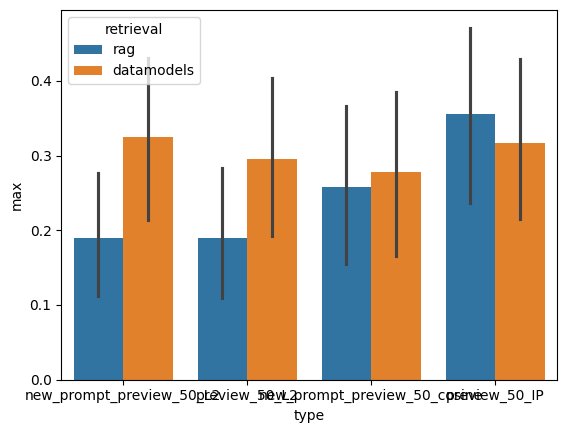

In [26]:
_agg_f1 = (
    df
    .filter(pl.col("metric") == "rouge_l")
    .group_by(["retrieval", "type", "idx"])
    .agg(pl.col("max").mean())
)

sns.barplot(
    data=_agg_f1,
    x="type",
    y="max",
    hue="retrieval"
)

<Axes: xlabel='idx', ylabel='mean'>

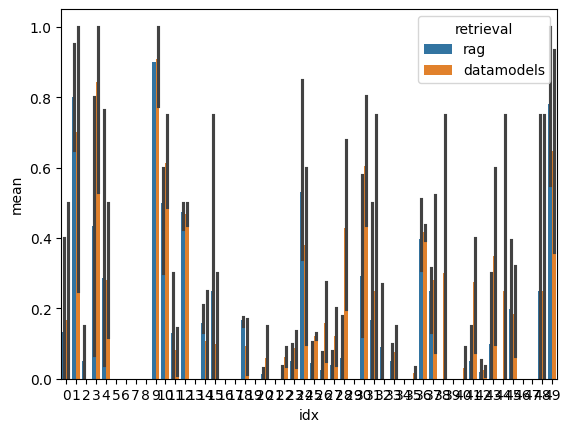

In [29]:
_agg_f1 = (
    df
    .filter(pl.col("metric") == "rouge_l")
    .group_by(["retrieval", "type", "idx"])
    .agg(pl.col("mean").mean())
)

sns.barplot(
    data=_agg_f1,
    x="idx",
    y="mean",
    hue="retrieval"
)